In [1]:
# !pip install tashaphyne
# !pip install emoji

In [1]:
import pandas as pd 
import numpy as np
import nltk
from tashaphyne.stemming import ArabicLightStemmer
import warnings as wr
import regex as re
from sklearn.model_selection import train_test_split
import emoji
import matplotlib.pyplot as plt
wr.filterwarnings("ignore")

In [2]:
def Cleaning(copy_data):
    copy_data['class']=copy_data['class'].replace({'pos':0,'neg':1})
    copy_data.drop(copy_data.columns[copy_data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True) #remove unnamed columns . 
    copy_data['sentenses_len'] = 0
    copy_data['puretext'] = 0 
    copy_data['#english_words'] = 0 
    copy_data['#hashtags'] = 0 
    copy_data['#mentioning'] = 0 
    copy_data['#hyperlinks'] = 0 
    copy_data['#numbers'] = 0
    copy_data['#emojis']=0
    
    return copy_data

In [3]:
def tokenization(x,idx): # take data copy
        tokens = nltk.word_tokenize(x['text'][idx])
        return tokens
def segmentation(x,idx): # take data copy 
    s_tokens = nltk.data.load('tokenizers/punkt/english.pickle')
    sentens = s_tokens.tokenize(x['text'][idx])
    x['sentenses_len'][i] = len(sentens) #save length of sentenses in the csv "data set "  file  
    # print(len(sentens))    
def drop_stop_words(x): #take data copy
    arb_stop_words = set(nltk.corpus.stopwords.words("arabic"))
    tokensOfpureTextWithoutstop=[token for token in x if token not in arb_stop_words]
    return tokensOfpureTextWithoutstop
def stemming_Light(x):
    ArListem = ArabicLightStemmer()
    stemming_Light =[ArListem.light_stem(token) for token in x]
    return stemming_Light
def stemming(x):
    st = nltk.ISRIStemmer()
    stemming_root =[st.stem(token) for token in x]
    return stemming_root

In [4]:
def removing_mentioning(text):
    return re.sub(r"@[a-zA-Z0-9]+",'',text)
def removing_hashtags(text):
    return re.sub(r"#[a-zA-Z0-9أ-ى]+",'',text)
def remove_newlines_tabs(text):
    return ' '.join(text.replace('\n', ' ').replace('\t',' ').split())
def remove_numbers(text):
    return re.sub('\d+', '', text)
def remove_links(text):
    return re.sub(r'https?:\/\/.*[\r\n]*', '', text)
def remove_emojis(text):
    return emoji.replace_emoji(text, '').replace('☻', ' ')
def remove_english(text):
    return re.sub('[A-Za-z]+', '', text)

In [5]:
def spliting (data_,target,test_size=0.33):
    X_train, X_test, y_train, y_test = train_test_split(data_, target, test_size=test_size, random_state=44, shuffle =True)
    return X_train, X_test, y_train, y_test


# Data set 

In [6]:
data=pd.read_csv('data_set.csv')
data = Cleaning(data)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45274 entries, 0 to 45273
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   class           45274 non-null  int64 
 1   text            45274 non-null  object
 2   sentenses_len   45274 non-null  int64 
 3   puretext        45274 non-null  int64 
 4   #english_words  45274 non-null  int64 
 5   #hashtags       45274 non-null  int64 
 6   #mentioning     45274 non-null  int64 
 7   #hyperlinks     45274 non-null  int64 
 8   #numbers        45274 non-null  int64 
 9   #emojis         45274 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 3.5+ MB


In [8]:
data.head()

,class,text,sentenses_len,puretext,#english_words,#hashtags,#mentioning,#hyperlinks,#numbers,#emojis
0,1,اعترف ان بتس كانو شوي شوي يجيبو راسي لكن اليوم...,0,0,0,0,0,0,0,0
1,1,توقعت اذا جات داريا بشوفهم كاملين بس لي للحين ...,0,0,0,0,0,0,0,0
2,1,#الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال و...,0,0,0,0,0,0,0,0
3,1,نعمة المضادات الحيوية . تضع قطرة💧مضاد بنسلين ع...,0,0,0,0,0,0,0,0
4,1,الدودو جايه تكمل علي 💔,0,0,0,0,0,0,0,0


In [9]:
data.describe()

,class,sentenses_len,puretext,#english_words,#hashtags,#mentioning,#hyperlinks,#numbers,#emojis
count,45274.000000,45274.0,45274.0,45274.0,45274.0,45274.0,45274.0,45274.0,45274.0
mean,0.497283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.499998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


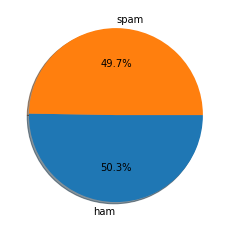

In [10]:
plt.pie(data['class'].value_counts(), labels=['ham','spam'], counterclock=False, shadow=True, autopct='%1.1f%%', radius=1, startangle=0)
plt.show()

### Preprocessing

In [11]:
for i in range(0,data.shape[0]):
    tokens = tokenization(data , i )
    data['#english_words'][i] = len(re.findall(r'[A-Za-z]+', data['text'][i]))
    data['#hyperlinks'][i] = len(re.findall(r'https?:\/\/.*[\r\n]*', data['text'][i]))
    data['#numbers'][i] = len(re.findall('\d+', data['text'][i]))
    data['#hashtags'][i] = len(re.findall(r"#[a-zA-Z0-9أ-ى]+", data['text'][i]))
    data['#mentioning'][i] = len(re.findall(r"@[a-zA-Z0-9]+", data['text'][i]))
    data['#emojis'][i]=emoji.emoji_count(data['text'][i])
    segmentation(data,i)
    pure_tokens = drop_stop_words(tokens)
#     pure_tokens = stemming_Light(pure_tokens) #-> light_streamer , we don't use it . 
    pure_tokens = stemming(pure_tokens)
    data['puretext'][i] = ' '.join(pure_tokens)
    # print(tokens)

In [12]:
data.drop('text',axis=1,inplace=True)

In [13]:
data['puretext'] = data['puretext'].apply(removing_mentioning)
data['puretext'] = data['puretext'].apply(removing_hashtags)
data['puretext'] = data['puretext'].apply(remove_numbers)
data['puretext'] = data['puretext'].apply(remove_links)
data['puretext'] = data['puretext'].apply(remove_emojis)
data['puretext'] = data['puretext'].apply(remove_english)

In [14]:
copy_data=data.iloc[:,[1,3,4,5,6,7,8]]

In [15]:
copy_data.head()

,sentenses_len,#english_words,#hashtags,#mentioning,#hyperlinks,#numbers,#emojis
0,1,0,0,0,0,0,1
1,1,1,1,0,0,0,1
2,1,1,2,0,0,0,1
3,3,0,0,0,0,0,3
4,1,0,0,0,0,0,1


#### Counting 

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
counting_vec =CountVectorizer(binary=False)
features = counting_vec.fit_transform(data['puretext']).astype('int8')
counting =pd.DataFrame(features.toarray(), columns= counting_vec.vocabulary_.keys())

In [17]:
X_train, X_test, y_train, y_test=spliting (counting,data['class'],test_size=0.4)
comparing_train=[]
comparing_test=[]

In [18]:
from sklearn.svm import LinearSVC

linear_svc=LinearSVC(C=.03)

linear_svc.fit(X_train,y_train)

print('SVCModel Train Score is : ' , linear_svc.score(X_train, y_train))
print('SVCModel Train Score is : ' , linear_svc.score(X_test, y_test))

comparing_train.append(linear_svc.score(X_train, y_train))
comparing_test.append(linear_svc.score(X_test, y_test))

SVCModel Train Score is :  0.8313208658518627
SVCModel Train Score is :  0.7500276090557703


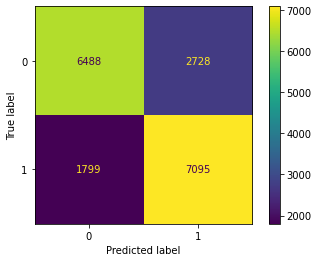

In [19]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(linear_svc, X_test, y_test) 
plt.show()

### Binary Encoding

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
counting_vec =CountVectorizer(binary=True)
features = counting_vec.fit_transform(data['puretext']).astype('int8')
counting =pd.DataFrame(features.toarray(), columns= counting_vec.vocabulary_.keys())

In [21]:
X_train, X_test, y_train, y_test=spliting (counting,data['class'],test_size=0.4)


In [22]:
linear_svc=LinearSVC(C=.03)

linear_svc.fit(X_train,y_train)

print('SVCModel Train Score is : ' , linear_svc.score(X_train, y_train))
print('SVCModel Train Score is : ' , linear_svc.score(X_test, y_test))


SVCModel Train Score is :  0.83102635841555
SVCModel Train Score is :  0.7506902263942573


In [23]:
comparing_train.append(linear_svc.score(X_train, y_train))
comparing_test.append(linear_svc.score(X_test, y_test))

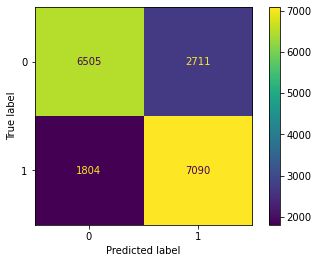

In [24]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(linear_svc, X_test, y_test) 
plt.show()

### TF-IDF

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
features = vec.fit_transform(data['puretext']).astype('float32')
tf_idf =pd.DataFrame(features.toarray(), columns= vec.vocabulary_.keys())


In [28]:
X_train, X_test, y_train, y_test=spliting (tf_idf,data['class'],test_size=0.4)


In [29]:
linear_svc=LinearSVC(C=.03)

linear_svc.fit(X_train,y_train)

print('SVCModel Train Score is : ' , linear_svc.score(X_train, y_train))
print('SVCModel Train Score is : ' , linear_svc.score(X_test, y_test))

comparing_train.append(linear_svc.score(X_train, y_train))
comparing_test.append(linear_svc.score(X_test, y_test))

SVCModel Train Score is :  0.7809600942423797
SVCModel Train Score is :  0.7308669243511872


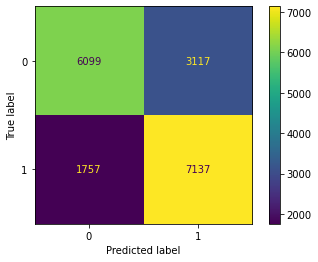

In [30]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(linear_svc, X_test, y_test) 
plt.show()

In [31]:
import matplotlib.pyplot as plt

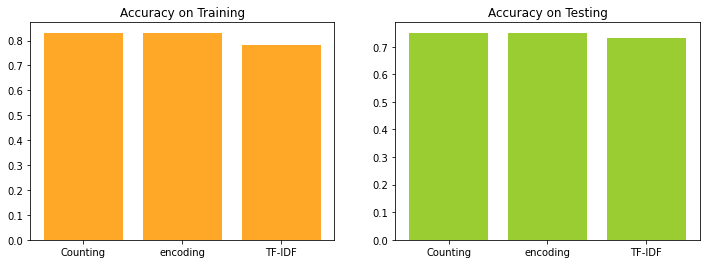

In [32]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
x=['Counting','encoding','TF-IDF']
plt.bar(x,comparing_train,color='#FFA726')
plt.title('Accuracy on Training')

plt.subplot(1,2,2)
plt.bar(x,comparing_test,color='yellowgreen')
plt.title('Accuracy on Testing')


plt.show()